# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os
import joblib

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [25]:
data_path = "../personality_dataset_raw.csv"

if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset not found at {data_path}. Please check the path.")

df = pd.read_csv(data_path)
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [21]:
print("Missing values in each column:")
df.isnull().sum()

Missing values in each column:


Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

**Distribusi Personality**

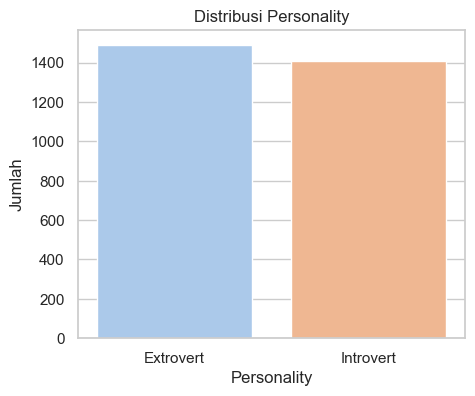

In [20]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Personality', palette='pastel', hue='Personality', legend=False)
plt.title('Distribusi Personality')
plt.ylabel('Jumlah')
plt.show()

**Rata-rata aktivitas sosial per Personality**

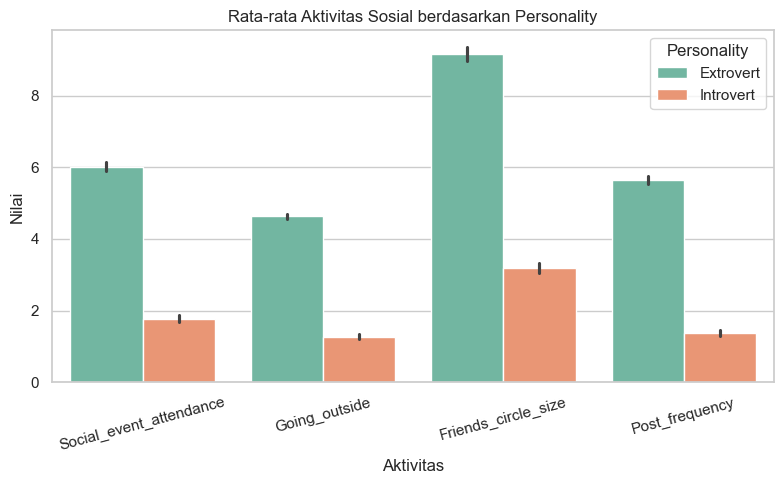

In [15]:
social_features = ['Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
melted = df.melt(id_vars='Personality', value_vars=social_features, var_name='Aktivitas', value_name='Nilai')

plt.figure(figsize=(8, 5))
sns.barplot(data=melted, x='Aktivitas', y='Nilai', hue='Personality', palette='Set2')
plt.title('Rata-rata Aktivitas Sosial berdasarkan Personality')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


**Korelasi antar fitur numerik**

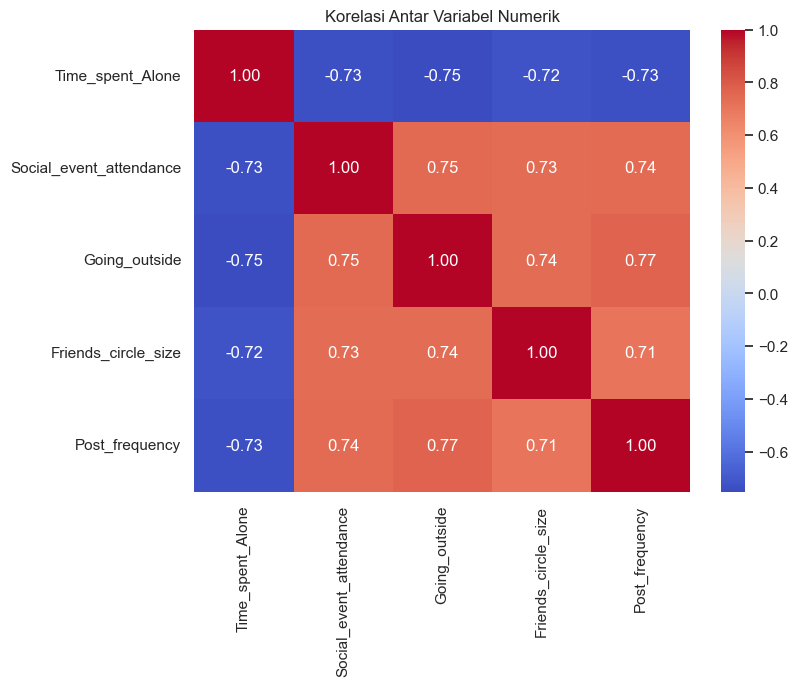

In [22]:
numerical_data = df.select_dtypes(include='number')
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

In [23]:
numerical_data.corr()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
Time_spent_Alone,1.000000,-0.733011,-0.750760,-0.717185,-0.732649
Social_event_attendance,-0.733011,1.000000,0.747756,0.734795,0.744615
Going_outside,-0.750760,0.747756,1.000000,0.736390,0.770819
Friends_circle_size,-0.717185,0.734795,0.736390,1.000000,0.707888
Post_frequency,-0.732649,0.744615,0.770819,0.707888,1.000000


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

**Menangani missing values**  
Data numerik: imputasi dengan median  
Data kategorikal: imputasi dengan modus

In [30]:
df.fillna({
    'Time_spent_Alone': df['Time_spent_Alone'].median(),
    'Social_event_attendance': df['Social_event_attendance'].median(),
    'Going_outside': df['Going_outside'].median(),
    'Friends_circle_size': df['Friends_circle_size'].median(),
    'Post_frequency': df['Post_frequency'].median(),
    'Stage_fear': df['Stage_fear'].mode()[0],
    'Drained_after_socializing': df['Drained_after_socializing'].mode()[0]
}, inplace=True)

**Encoding fitur kategorikal**  
Mengubah data object menjadi angka.

In [ ]:
df['Stage_fear'] = LabelEncoder().fit_transform(df['Stage_fear'])
df['Drained_after_socializing'] = LabelEncoder().fit_transform(df['Drained_after_socializing'])
df['Personality'] = LabelEncoder().fit_transform(df['Personality'])

**Normalisasi / standarisasi data numerik**

In [33]:
numerical_cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

**Memisahkan fitur dan label**

In [ ]:
X = df.drop('Personality', axis=1)
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Menyimpan hasil preprocessing**

In [ ]:
joblib.dump(numerical_cols, 'personality_dataset_preprocessing/feature_names.pkl')
joblib.dump(scaler, 'personality_dataset_preprocessing/scaler.pkl')

train_df = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
test_df = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)

train_df.to_csv('personality_dataset_preprocessing/train_data.csv', index=False)
test_df.to_csv('personality_dataset_preprocessing/test_data.csv', index=False)